In [3]:
import os
import pandas as pd
import numpy as np
import re
import time
from datetime import datetime, date
from tabulate import tabulate #DF예쁘게 출력하기
import calendar
import seaborn as sns

# 개념
- NumPy는 “Numerical Python“의 약자. 
- 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공. 파이썬에서 선형대수 기반의 프로그램을 쉽게 만들 수 있도록 지원하는 대표적인 패키지
<br>

- 많은 머신러닝 알고리즘이 넘파이 기반으로 작성돼 있으며, 알고리즘의 입출력 데이터를 넘파이 배열 타입으로 사용함
- 넘파이의 기본 데이터 타입은 ndarray. ndarray를 이용해 넘파이에서 다차원 배열을 쉽게 생성하고 다양한 연산 수행
<br>

- 강력한 N 차원 배열 객체
- 정교한 broadcasting 기능
- 빠른 처리속도

## 배열 기본정보

In [2]:
data = np.random.randint(1,10,size=(2,5,3))

In [3]:
print(data.shape) #크기
print(data.dtype)
print(data.ndim) #차원

(2, 5, 3)
int32
3


# 연산

## 기본 사칙연산

In [4]:
#np.random.randn(m,n) : 정규분포를 이루는 값을 (m,n)배열로 추출
data = np.random.randn(2,3)
print(data, '\n')
print(data*10, '\n')
print(data + data)

[[ 0.13825847 -0.70146544 -0.12224531]
 [ 2.58928132 -0.95757225 -0.37246198]] 

[[ 1.38258469 -7.01465436 -1.2224531 ]
 [25.8928132  -9.5757225  -3.72461978]] 

[[ 0.27651694 -1.40293087 -0.24449062]
 [ 5.17856264 -1.9151445  -0.74492396]]


- 행렬곱 : np.dot() / matmul() <br>
: 행렬곱에서는 (mxn)*(nxp)처럼 맞닿는 부분의 행,열이 동일해야한다.

In [39]:
ar1 = np.arange(9).reshape(3,3)
print(np.dot(ar1,ar1.T), '\n')
print(np.matmul(ar1, ar1.T))

[[  5  14  23]
 [ 14  50  86]
 [ 23  86 149]] 

[[  5  14  23]
 [ 14  50  86]
 [ 23  86 149]]


## numpy제공 연산

-  누적덧셈 : ar.cumsum(axis=0)

In [99]:
arr = np.arange(1,10).reshape(3,3)
print(arr, '\n')
print(arr.cumsum(), '\n') #누적 덧셈
print(arr.cumsum(axis=0),'\n') #행 방향으로 더하기
print(arr.cumsum(axis=1)) #열 방향으로 더하기

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[ 1  3  6 10 15 21 28 36 45] 

[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]] 

[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


- 곱셈 : ar.prod(axis=0) / 누적곱셈 : ar.cumprod(axis=0)

In [105]:
print(arr, '\n')
print(arr.prod(), '\n') #전체
print(arr.prod(axis=1), '\n')  #열방향

print(arr.cumprod(), '\n') #전체 누적곱
print(arr.cumprod(axis=0), '\n') #전체 누적곱

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

362880 

[  6 120 504] 

[     1      2      6     24    120    720   5040  40320 362880] 

[[  1   2   3]
 [  4  10  18]
 [ 28  80 162]] 



- 나머지 : np.mod(ar1, ar2) / np.remainder(a1,ar2)

In [108]:
v1 = np.array([15,30,45])
v2 = np.array([2,7,9])

print(np.mod(v1,v2))
print(np.remainder(v1,v2))

[1 2 0]
[1 2 0]


- 역수 구하기 : np.reciprocal(a)

In [110]:
value = np.array([0.85, 1.85, 1, 100])
print(np.reciprocal(value))

[1.17647059 0.54054054 1.         0.01      ]


- 승수 : np.power(ar1, n)

In [112]:
np.power(v2,3)

array([  8, 343, 729], dtype=int32)

- meshgrid함수 <br>
: 두개의 1차원 배열을 받아서 가능한 모든(x,y)짝으로 구성된 2차원 배열 반환

In [130]:
x = np.arange(1,4)
y = np.arange(1,4)
xs, ys = np.meshgrid(x,y) # ?
print(xs)
print(ys)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


# 정렬

## sort

- np.sort(arr) : 복사본을 반환

In [129]:
arr = np.random.randint(1,100, size=10)
print(arr, '\n')
print(np.sort(arr),'\n') #따로 저장해줘야 함
print(arr, '\n') #기존것은 변경X

[57 61 78 31 25  3  4 95 99 14] 

[ 3  4 14 25 31 57 61 78 95 99] 

[57 61 78 31 25  3  4 95 99 14] 



In [131]:
#행렬의 sort
arr2d = np.array([[8,12],
                  [7,1]])

sort_arr2d_s0 = np.sort(arr2d, axis=0)
print(sort_arr2d_s0,'\n')

sort_arr2d_s1 = np.sort(arr2d, axis=1)
print(sort_arr2d_s1)

[[ 7  1]
 [ 8 12]] 

[[ 8 12]
 [ 1  7]]


- arr.sort() : 원본에 반영

In [133]:
arr = np.random.randn(6)
print(arr, '\n')
arr.sort()
print(arr, '\n')

[ 1.54371643 -0.40211489  0.8647491  -0.22686923  0.81116027  0.28779461] 

[-0.40211489 -0.22686923  0.28779461  0.81116027  0.8647491   1.54371643] 



In [134]:
#n차원 정렬
arr = np.random.randn(5,3)
print(arr, '\n')
arr.sort(axis=1) #열방향 #default
print(arr, '\n') 
arr.sort(axis=0) #행방향
print(arr, '\n') 

[[-0.53846816  1.9084621  -0.475776  ]
 [ 1.44073112 -1.14907568  0.80571455]
 [ 1.75610703  0.97297991 -1.55111911]
 [ 0.19114348  1.60477607 -1.42002593]
 [-2.44378268 -2.05633855 -0.99225755]] 

[[-0.53846816 -0.475776    1.9084621 ]
 [-1.14907568  0.80571455  1.44073112]
 [-1.55111911  0.97297991  1.75610703]
 [-1.42002593  0.19114348  1.60477607]
 [-2.44378268 -2.05633855 -0.99225755]] 

[[-2.44378268 -2.05633855 -0.99225755]
 [-1.55111911 -0.475776    1.44073112]
 [-1.42002593  0.19114348  1.60477607]
 [-1.14907568  0.80571455  1.75610703]
 [-0.53846816  0.97297991  1.9084621 ]] 



In [135]:
#정렬된 행렬의 인덱스를 반환 : 기존 원본 행렬의 원소에 대한 인덱스를 필요로 할 때
org_array = np.array([3,1,9,5])
sort_indices = np.argsort(org_array)
print(org_array, '\n')
print(sort_indices)

[3 1 9 5] 

[1 0 3 2]


In [25]:
ar = np.arange(1,10).reshape(3,3)
np.sort(ar)[:,::-1] #인덱싱~~~~

array([[3, 2, 1],
       [6, 5, 4],
       [9, 8, 7]])

## np.where(조건, T, F)
- 삼항식의 벡터화 버전

In [122]:
arr = np.random.randint(1,10, size =(4,4))
print(arr, '\n')

np.where(arr>5, 11,0) #조건만족시 > 11, 아니면 > 0

[[1 2 6 4]
 [1 6 1 2]
 [3 5 3 1]
 [4 3 1 8]] 



array([[ 0,  0, 11,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0, 11]])

# 차원 변경 
## reshape(a,b,c)

- 배열로 전환 : np.array(data)

In [ ]:
#다차원 배열 만들기
data2 = [[1,2,3,4],[5,6,7,8]] # 현재는 list
#배열로 전환 #pd.DataFrame과 비슷한 것.
arr2 = np.array(data2)

print(arr2)
print(arr2.ndim)
print(arr2.shape)

- 차원 변경 : reshape(a,b,c)

In [14]:
ar= np.arange(30)
#2차원으로 변환
ar2 = ar.reshape(2,15)
print(ar2.shape, ar2.ndim,'\n', ar2,'\n')
#3차원으로 변환
ar3 = ar.reshape(2,3,5)
print(ar3.shape, ar3.ndim,'\n', ar3)

(2, 15) 2 
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]] 

(2, 3, 5) 3 
 [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]


- reshape (-1)을 사용한 차원 변경 : 해당 자리는 자동할당

In [18]:
# 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정"
ar2 = ar.reshape(-1,15)
ar3 = ar.reshape(-1,3,5)
print(ar2, ar2.ndim, ar2.shape, '\n')
print(ar3, ar3.ndim, ar3.shape)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]] 2 (2, 15) 

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]] 3 (2, 3, 5)


# 전치 
## np.transpose() / np.swapaxes()

- 2차원 전치 (0,1)

In [14]:
# np.transpose() / arr.T / arr.transpose()
arr2 = np.arange(1,10).reshape(3,3)
arr2.T
arr2.transpose()
np.transpose(arr2)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [18]:
# np.swapaxes / swapaxes(arr, 바꿀 축 2개)
arr2
arr2.swapaxes(0,1)
np.swapaxes(arr2,0,1)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

- 3차원 전치 (0,1,2) <br>
: 자릿수 인덱싱으로 .. 작은 숫자일수록 높은 차원을 의미

In [32]:
arr3 = np.arange(30).reshape(2,3,5)
print(arr3, arr3.shape, '\n')

#3차원과 2차원 바꾸기
arr3_1= arr3.transpose(1,0,2)
print(arr3_1, arr3_1.shape, '\n')

arr3_2 = np.swapaxes(arr3, 1,0) #swapaxes는 두개씩 맞교환?밖에 안됨.
print(arr3_2, arr3_2.shape)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]] (2, 3, 5) 

[[[ 0  1  2  3  4]
  [15 16 17 18 19]]

 [[ 5  6  7  8  9]
  [20 21 22 23 24]]

 [[10 11 12 13 14]
  [25 26 27 28 29]]] (3, 2, 5) 

[[[ 0  1  2  3  4]
  [15 16 17 18 19]]

 [[ 5  6  7  8  9]
  [20 21 22 23 24]]

 [[10 11 12 13 14]
  [25 26 27 28 29]]] (3, 2, 5)


# 행렬의 종류

https://math-development-geometry.tistory.com/52

- 정방행렬 : 행과 열의 수가 같은 행렬 (m=n)
- 대각행렬 : 주대각선 원소를 제외한 모든 원소들이 0인 정방행렬 (m=n), 항등행렬과 다르게 주대각선 원소에 1이외의 수가 가능
- 항등행렬은 행렬 곱셈 연산에 항등원으로 작용하는 행렬 (=단위행렬)
- 삼각행렬 : 주대각선 원소를 기준으로 위 또는 아래에 있는 성분이 모두 0인 정방행렬, 하삼각행렬(위 삼각형이 모두 0), 상삼각행렬(아래 삼각형이 모두 0)
- 영행렬은 모든 원소가 0인 행렬로 곱셈 연산에서 영원으로 작용하는 행렬
- 전치행렬은 주대각선 원소를 기준으로 행과 열을 바꿔주는 행렬, 주대각원소는 변하지 않음
- 직교행렬은 행렬 A의 역행렬이 A의 전치행렬이고 A의 전치행렬과 A 행렬을 곱하였을때 항등행렬이 나오게 하는 행렬A <BR>
: A의 역행렬 = A의 전치행렬 > np.dot(A전치, A) = I 

<img src='./직교행렬.jpg' STYLE= width300px;>


In [58]:
print(np.full((3,3),1),'\n') #정방행렬
print(np.eye(3)) #항등행렬, 단위행렬


[[1 1 1]
 [1 1 1]
 [1 1 1]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 역행렬 : np.linalg.inv(mt)
- 행렬A와 곱했을 때, 항등행렬E가 나오는 행렬

In [72]:
#linalg라는 서브모듈이 필요
np.random.seed(0)
mt1= np.random.randint(1,4, size=(3,3))
print(mt1, '\n')
mt2 = np.linalg.inv(mt1)
print(mt2, '\n')

#행렬 * 역행렬 = 항등행렬
np.dot(mt1, mt2)

[[1 2 1]
 [2 2 3]
 [1 3 1]] 

[[ 7. -1. -4.]
 [-1.  0.  1.]
 [-4.  1.  2.]] 



array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# 배열 초기화
- np.ones() / np.full() / np.eye() / np.zeros() <br>
원하는 shape로 배열을 설정하고, 각 요소를 특정 값으로 초기화
<br>

- np.zeros_like(), np.ones_like(), np.full_like() <br>
: 파라미터로 입력한 배열과 같은 shape의 배열을 만듦 

In [54]:
print(np.zeros((3,3)),'\n')
print(np.full((3,3),4),'\n')
print(np.ones((3,3)),'\n')
print(np.eye(3,3)) #항등행렬

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[4 4 4]
 [4 4 4]
 [4 4 4]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [80]:
a= np.arange(10).reshape(2,5)
print(a)
z = np.zeros_like(a) #zero를 a.shape으로
o = np.ones_like(a)
f = np.full_like(a,5)
z, o ,f

[[0 1 2 3 4]
 [5 6 7 8 9]]


(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]),
 array([[5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5]]))

- np.tile(반복할 ar, (m,n)) <br>

1) np.zeros((8,8))을 이용하여 아래와 같이 출력하세요 <br>
```
array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])
```

In [141]:
#방법1
ar = np.zeros((8,8))
ar_tile = np.array([[0,1],[1,0]]) #반복할 ar

np.tile(ar_tile,(4,4))

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [148]:
#방법2
ar = np.zeros((8,8))
ar[::2,1::2] =1
ar[1::2,::2]=1
ar

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

# 기타

## np.linspace(a, b, n)
- a~b사이를 n으로 균등하게 나누기

In [61]:
np.linspace(1,10) # default : n =50

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

In [65]:
print(np.linspace(1,10, 4))
np.linspace(1,10,4, retstep=True) #구간 간격 값

[ 1.  4.  7. 10.]


(array([ 1.,  4.,  7., 10.]), 3.0)

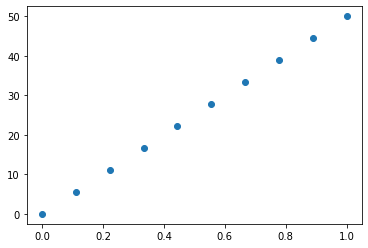

In [67]:
import matplotlib.pyplot as plt
x = np.linspace(0,1,10)
y = np.linspace(0,50,10)
plt.plot(x,y,'o') #표기할 문자

# ndarray 데이터 형태
<img src= '데이터형태.jpg' STYLE='width:500px;'>

## 데이터 형태 지정 및 변경

- astype('type')

In [81]:
arr = np.array([1,2,3,4,5],)
print(arr.dtype)

float_arr = arr.astype('float')
print(float_arr.dtype)

int32
float64


In [82]:
numeric_string = np.array([1,2,3,4,5], dtype='S') #만들면서 type지정 가능
print(numeric_string, numeric_string.dtype) #'S'는 바이트 문자열 > (b=byte)

[b'1' b'2' b'3' b'4' b'5'] |S1


In [83]:
num = numeric_string.astype('int')
print(num, num.dtype)

[1 2 3 4 5] int32


- tolist()

In [91]:
# ar > list
ar = np.array([1,2,3,4,5])
print(ar.tolist(), type(ar.tolist()))

[1, 2, 3, 4, 5] <class 'list'>


# 뷰(참조)
- 넘파이의 ndarray를 슬라이싱할 때는 파이썬의 리스트(list)와 다르게 원본의 <참조>가 생성 <br>
: 복사가 남발되면 메모리 문제를 일으킬 소지가 많기 때문

- 복사가 아니고 뷰(참조의 개념)이기 때문에 원본이 바뀌면, 참조본도 바뀜
- 리스트의 슬라이싱에서는 복사본이 생성되는 것과는 다른 동작이기 때문에 주의
- 슬라이싱의 복사본을 생성하고 싶다면 copy() 속성을 이용

http://taewan.kim/post/numpy_cheat_sheet/

In [88]:
# list - copy
li = list(np.arange(1,11))
print(li, '\n')

li_slice = li[:5] #copy
print(li_slice, '\n')
li_slice[1] = 0

print(li_slice,'\n')
print(li)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

[1, 2, 3, 4, 5] 

[1, 0, 3, 4, 5] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [85]:
# array - view : 원본을 변경
arr = np.arange(10)
print(arr,'\n')

li_slice = arr[5:8] #view
print(li_slice,'\n')
li_slice[:] = 12
print(li_slice,'\n')

print(arr)

[0 1 2 3 4 5 6 7 8 9] 

[5 6 7] 

[12 12 12] 

[ 0  1  2  3  4 12 12 12  8  9]


# 인덱싱
- 기존의 pandas와 동일

## boolean 인덱싱

In [115]:
arr1d = np.arange(1,10)
arr1 = arr1d[arr1d > 5 ]
print(arr1, '\n')

print(arr1d > 5) #bool값 반환
(arr1d > 5).sum() #True의 갯수 반환

[6 7 8 9] 

[False False False False False  True  True  True  True]


4

In [97]:
#Q1. 1~100까지 정수에서 3의 배수인 것만을 출력(for문과 배열, 두가지방식)
#for
for i in range(1,101):
    if i%3 ==0:
        print(i,end=',')

#배열
arr = np.arange(1,101)
arr[arr%3 ==0]

3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])

- any(), all() 메서드

In [116]:
bools= np.array([False, False, True, True])
print(bools.any()) #하나라도 참이면 참
bools.all() #전부다 참일 때, 참

True


False

## np.where(조건, T, F)
- 삼항식의 벡터화 버전

In [126]:
arr = np.random.randint(-10,10, size =(4,4))
print(arr, '\n')

np.where(arr>0, 1,0) #조건만족시 > 11, 아니면 > 0

[[ -9  -6   0   1]
 [ -2   1  -8   9]
 [  6 -10 -10  -4]
 [  9   4   0   9]] 



array([[0, 0, 0, 1],
       [0, 1, 0, 1],
       [1, 0, 0, 0],
       [1, 1, 0, 1]])

In [128]:
# Q. arr의 모든 양수를 2로 변경하세요.
np.where(arr>0,1,arr)

array([[ -9,  -6,   0,   1],
       [ -2,   1,  -8,   1],
       [  1, -10, -10,  -4],
       [  1,   1,   0,   1]])

# random

## np.random
- np.random.seed : seed를 통한 난수 생성
- np.random.randint : 정수 난수 1개 생성
- np.random.rand : 0부터 1사이의 균일분포에서 난수 매트릭스 배열 생성
- np.random.randn : 가우시안 표준 정규분포에서 난수 매트릭스 배열 생성
- np.random.shuffle : 기존의 데이터의 순서 바꾸기
- np.random.choice : 기존 데이터에서 sampling

## python random
- import random
- random.random() : 0과 1 사이 난수 반환
- random.randint() : 지정범위 내(끝 값 포함), 정수 난수 반환
- random.uniform(min,max) : min, max 사이 float반환
- random.randarange() : 지정범위 내, 정수 반환
- random.choice(list) : list 중 only 1개 반환 #문자에 사용가능
- random.sample(list, n) : list 중 n개 반환(중복없이) #문자에 사용가능
- random.shuffle(list) / print(list) : list를 무작위로 섞어 반환 > print로 출력해야함

In [5]:
#python의 random
import random
print(random.random(),'\n')
print(random.randint(1,10),'\n') 
print(random.uniform(10,20),'\n')
print(random.randrange(10),'\n') 
print(random.choice([1,2,3,4,5]),'\n')

li=[1,2,3,4,5]
print(random.sample(li, 3)) 

random.shuffle(li) 
print(li)

0.13139852791722728 

2 

10.417546391874637 

0 

5 

[3, 2, 1]
[3, 1, 2, 5, 4]
